In [17]:
import xgboost as xgb
import numpy as np
import pandas as pd

In [18]:


import os, pandas as pd
# Add asset from file system
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')
df_data_1 = pd.read_csv(os.environ['DSX_PROJECT_DIR']+'/datasets/2017_2007_water_levels_hattorf_daily_avg.csv', sep=";", infer_datetime_format=True,date_parser=dateparse, parse_dates=["date"] )
df_data_1.head()



measurement_site_no measurement_site       date                 parameter  \
0              4882168          Hattorf 2014-12-31  Waterlevel_daily_average   
1              4882168          Hattorf 2013-12-31  Waterlevel_daily_average   
2              4882168          Hattorf 2011-12-31  Waterlevel_daily_average   
3              4882168          Hattorf 2007-12-31  Waterlevel_daily_average   
4              4882168          Hattorf 2014-10-31  Waterlevel_daily_average   

   value unit  
0    138   cm  
1    131   cm  
2    149   cm  
3    127   cm  
4    129   cm

In [19]:
%matplotlib inline
water_level = df_data_1.set_index(df_data_1.date)
water_level

measurement_site_no measurement_site       date  \
date                                                          
2014-12-31              4882168          Hattorf 2014-12-31   
2013-12-31              4882168          Hattorf 2013-12-31   
2011-12-31              4882168          Hattorf 2011-12-31   
2007-12-31              4882168          Hattorf 2007-12-31   
2014-10-31              4882168          Hattorf 2014-10-31   
2013-10-31              4882168          Hattorf 2013-10-31   
2011-10-31              4882168          Hattorf 2011-10-31   
2007-10-31              4882168          Hattorf 2007-10-31   
2014-08-31              4882168          Hattorf 2014-08-31   
2013-08-31              4882168          Hattorf 2013-08-31   
2011-08-31              4882168          Hattorf 2011-08-31   
2007-08-31              4882168          Hattorf 2007-08-31   
2014-07-31              4882168          Hattorf 2014-07-31   
2013-07-31              4882168          Hattorf 2013-07-31   
2011-07-31              4882168          Hattorf 2011-07-31   
2007-07-31              4882168          Hattorf 2007-07-31   
2014-05-31              4882168          Hattorf 2014-05-31   
2013-05-31              4882168          Hattorf 2013-05-31   
2011-05-31              4882168          Hattorf 2011-05-31   
2007-05-31              4882168          Hattorf 2007-05-31   
2014-03-31              4882168          Hattorf 2014-03-31   
2013-03-31              4882168          Hattorf 2013-03-31   
2011-03-31              4882168          Hattorf 2011-03-31   
2007-03-31              4882168          Hattorf 2007-03-31   
2014-01-31              4882168          Hattorf 2014-01-31   
2013-01-31              4882168          Hattorf 2013-01-31   
2011-01-31              4882168          Hattorf 2011-01-31   
2007-01-31              4882168          Hattorf 2007-01-31   
2014-12-30              4882168          Hattorf 2014-12-30   
2013-12-30              4882168          Hattorf 2013-12-30   
...                         ...              ...        ...   
2008-01-30              4882168          Hattorf 2008-01-30   
2008-01-29              4882168          Hattorf 2008-01-29   
2008-01-28              4882168          Hattorf 2008-01-28   
2008-01-27              4882168          Hattorf 2008-01-27   
2008-01-26              4882168          Hattorf 2008-01-26   
2008-01-25              4882168          Hattorf 2008-01-25   
2008-01-24              4882168          Hattorf 2008-01-24   
2008-01-23              4882168          Hattorf 2008-01-23   
2008-01-22              4882168          Hattorf 2008-01-22   
2008-01-21              4882168          Hattorf 2008-01-21   
2008-01-20              4882168          Hattorf 2008-01-20   
2008-01-19              4882168          Hattorf 2008-01-19   
2008-01-18              4882168          Hattorf 2008-01-18   
2008-01-17              4882168          Hattorf 2008-01-17   
2008-01-16              4882168          Hattorf 2008-01-16   
2008-01-15              4882168          Hattorf 2008-01-15   
2008-01-14              4882168          Hattorf 2008-01-14   
2008-01-13              4882168          Hattorf 2008-01-13   
2008-01-12              4882168          Hattorf 2008-01-12   
2008-01-11              4882168          Hattorf 2008-01-11   
2008-01-10              4882168          Hattorf 2008-01-10   
2008-01-09              4882168          Hattorf 2008-01-09   
2008-01-08              4882168          Hattorf 2008-01-08   
2008-01-07              4882168          Hattorf 2008-01-07   
2008-01-06              4882168          Hattorf 2008-01-06   
2008-01-05              4882168          Hattorf 2008-01-05   
2008-01-04              4882168          Hattorf 2008-01-04   
2008-01-03              4882168          Hattorf 2008-01-03   
2008-01-02              4882168          Hattorf 2008-01-02   
2008-01-01              4882168          Hattorf 2008-01-01   

                           parameter  valu

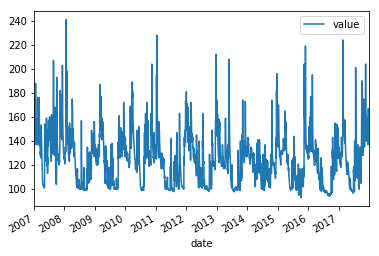

In [20]:
water_level.plot(y="value")

In [21]:
import datetime

water_level_2017 = water_level[ water_level.date > datetime.datetime(year = 2016, month = 12, day=31) ]
water_level_2017 = water_level_2017.sort_index()

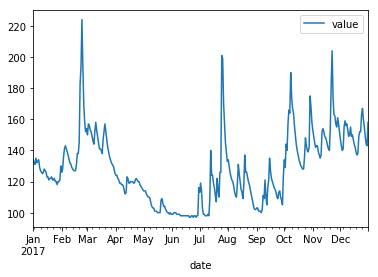

In [22]:
water_level_2017.plot(y="value")

In [23]:
water_level_2017 = water_level_2017[["value"]]
water_level_2017.head()

value
date             
2017-01-01    134
2017-01-02    132
2017-01-03    131
2017-01-04    135
2017-01-05    132

### Adding some lagging features

In [24]:
def add_prev_day(data, num_days, column="value"):
    data['prev_%d' % num_days] = data[column].shift(num_days)

def add_mean(data, num_days, column="value"):
    """
    Add the shift(1) to prevent data-leakage
    """
    data['mean_%d' % num_days] = data[column].rolling(window=num_days).mean().shift(1)

def add_std(data, num_days, column="value"):
    """
    Add the shift(1) to prevent data-leakage
    """
    data['std_%d' % num_days] = data[column].rolling(window=num_days).std().shift(1)

In [25]:
add_prev_day(water_level_2017, 1)
add_prev_day(water_level_2017, 7)

add_mean(water_level_2017, 7)

add_std(water_level_2017, 7)

In [27]:
water_level_2017

value  prev_1  prev_7      mean_7      std_7
date                                                    
2017-01-01    134     NaN     NaN         NaN        NaN
2017-01-02    132   134.0     NaN         NaN        NaN
2017-01-03    131   132.0     NaN         NaN        NaN
2017-01-04    135   131.0     NaN         NaN        NaN
2017-01-05    132   135.0     NaN         NaN        NaN
2017-01-06    133   132.0     NaN         NaN        NaN
2017-01-07    134   133.0     NaN         NaN        NaN
2017-01-08    129   134.0   134.0  133.000000   1.414214
2017-01-09    127   129.0   132.0  132.285714   1.976047
2017-01-10    126   127.0   131.0  131.571429   2.819997
2017-01-11    125   126.0   135.0  130.857143   3.532165
2017-01-12    126   125.0   132.0  129.428571   3.598942
2017-01-13    128   126.0   133.0  128.571429   3.598942
2017-01-14    127   128.0   134.0  127.857143   3.023716
2017-01-15    126   127.0   129.0  126.857143   1.345185
2017-01-16    123   126.0   127.0  126.428571   0.975900
2017-01-17    123   123.0   126.0  125.857143   1.573592
2017-01-18    121   123.0   125.0  125.428571   1.902379
2017-01-19    122   121.0   126.0  124.857143   2.544836
2017-01-20    122   122.0   128.0  124.285714   2.690371
2017-01-21    123   122.0   127.0  123.428571   2.225395
2017-01-22    121   123.0   126.0  122.857143   1.573592
2017-01-23    121   121.0   123.0  122.142857   0.899735
2017-01-24    122   121.0   123.0  121.857143   0.899735
2017-01-25    120   122.0   121.0  121.714286   0.755929
2017-01-26    120   120.0   122.0  121.571429   0.975900
2017-01-27    118   120.0   122.0  121.285714   1.112697
2017-01-28    120   118.0   123.0  120.714286   1.603567
2017-01-29    120   120.0   121.0  120.285714   1.253566
2017-01-30    121   120.0   121.0  120.142857   1.214986
...           ...     ...     ...         ...        ...
2017-12-02    143   147.0   162.0  155.857143   5.177791
2017-12-03    140   143.0   157.0  153.142857   6.283008
2017-12-04    141   140.0   155.0  150.714286   7.674944
2017-12-05    155   141.0   161.0  148.714286   8.179533
2017-12-06    159   155.0   157.0  147.857143   6.890297
2017-12-07    156   159.0   152.0  148.142857   7.358183
2017-12-08    157   156.0   147.0  148.714286   7.846746
2017-12-09    153   157.0   143.0  150.142857   8.375133
2017-12-10    149   153.0   140.0  151.571429   7.785824
2017-12-11    150   149.0   141.0  152.857143   6.121780
2017-12-12    155   150.0   155.0  154.142857   3.670993
2017-12-13    149   155.0   159.0  154.142857   3.670993
2017-12-14    150   149.0   156.0  152.714286   3.401680
2017-12-15    147   150.0   157.0  151.857143   3.184785
2017-12-16    144   147.0   153.0  150.428571   2.699206
2017-12-17    142   144.0   149.0  149.142857   3.338092
2017-12-18    139   142.0   150.0  148.142857   4.298394
2017-12-19    137   139.0   155.0  146.571429   5.380742
2017-12-20    138   137.0   149.0  144.000000   4.966555
2017-12-21    149   138.0   150.0  142.428571   4.859943
2017-12-22    152   149.0   147.0  142.285714   4.608481
2017-12-23    152   152.0   144.0  143.000000   5.715476
2017-12-24    163   152.0   142.0  144.142857   6.669047
2017-12-25    167   163.0   139.0  147.142857   9.616454
2017-12-26    160   167.0   137.0  151.142857  11.334734
2017-12-27    155   160.0   138.0  154.428571   9.778499
2017-12-28    149   155.0   149.0  156.857143   6.618876
2017-12-29    144   149.0   152.0  156.857143   6.618876
2017-12-30    143   144.0   152.0  155.714286   8.118175
2017-12-31    158   143.0   163.0  154.428571   9.413769

[365 rows x 5 columns]

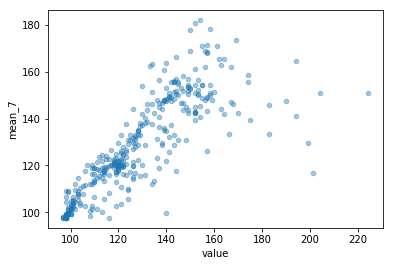

In [29]:
%matplotlib inline

_ = water_level_2017.plot(kind="scatter", x="value", y="mean_7", alpha=0.4)

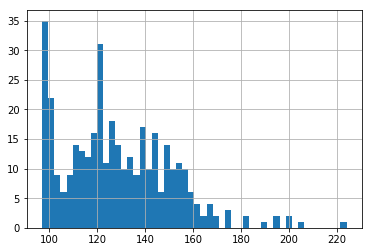

In [11]:
%matplotlib inline

_ = water_level_2017.value.hist(bins=50,)

In [30]:
from sklearn.model_selection import train_test_split, KFold

FEATURE_COLUMNS = water_level_2017.columns[1:]
print(FEATURE_COLUMNS)

observable_water_level_2017 = water_level_2017[20:]

x_train, x_test, y_train, y_test = train_test_split(observable_water_level_2017[FEATURE_COLUMNS], observable_water_level_2017["value"])

Index(['prev_1', 'prev_7', 'mean_7', 'std_7'], dtype='object')


In [31]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test)

params = {
    'objective' : 'reg:linear',
    #'tree_method':'hist',
    'min_child_weight' : 1,
    'eta' : 0.005,
    'seed' : 0,
    'gamma':0,
    'max_depth': 6,
    # 'colsample_bytree': 0.7,
    # 'subsample':0.7,
}

hist = xgb.cv(params, dtrain, nfold=3, as_pandas=True, num_boost_round=2000, verbose_eval=100, early_stopping_rounds=2000, show_stdv=True, seed=0)

[0]	train-rmse:128.231+0.266551	test-rmse:128.232+0.541493
[100]	train-rmse:78.8349+0.255309	test-rmse:78.8783+1.23007
[200]	train-rmse:48.8398+0.276508	test-rmse:49.085+1.68156
[300]	train-rmse:30.7149+0.321151	test-rmse:31.1034+2.0929
[400]	train-rmse:19.827+0.365504	test-rmse:20.4777+2.29585
[500]	train-rmse:13.2538+0.393153	test-rmse:14.5659+2.20708
[600]	train-rmse:9.24522+0.41768	test-rmse:11.6105+1.82402
[700]	train-rmse:6.75486+0.430694	test-rmse:10.3049+1.40618
[800]	train-rmse:5.15122+0.438291	test-rmse:9.80529+1.10914
[900]	train-rmse:4.08749+0.428812	test-rmse:9.72162+0.848799
[1000]	train-rmse:3.34115+0.445087	test-rmse:9.76951+0.711447
[1100]	train-rmse:2.80713+0.430016	test-rmse:9.8836+0.644662
[1200]	train-rmse:2.41716+0.407873	test-rmse:9.96116+0.611853
[1300]	train-rmse:2.13423+0.410696	test-rmse:10.0626+0.607633
[1400]	train-rmse:1.92373+0.413794	test-rmse:10.1433+0.615612
[1500]	train-rmse:1.77642+0.417028	test-rmse:10.2101+0.630097
[1600]	train-rmse:1.66094+0.42854

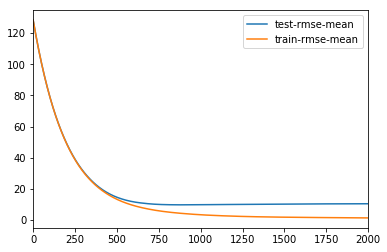

In [32]:
hist.plot(y=["test-rmse-mean", "train-rmse-mean"])

In [33]:
## xgboost on training data
bst = xgb.train(params, dtrain, num_boost_round=2000, verbose_eval=100)

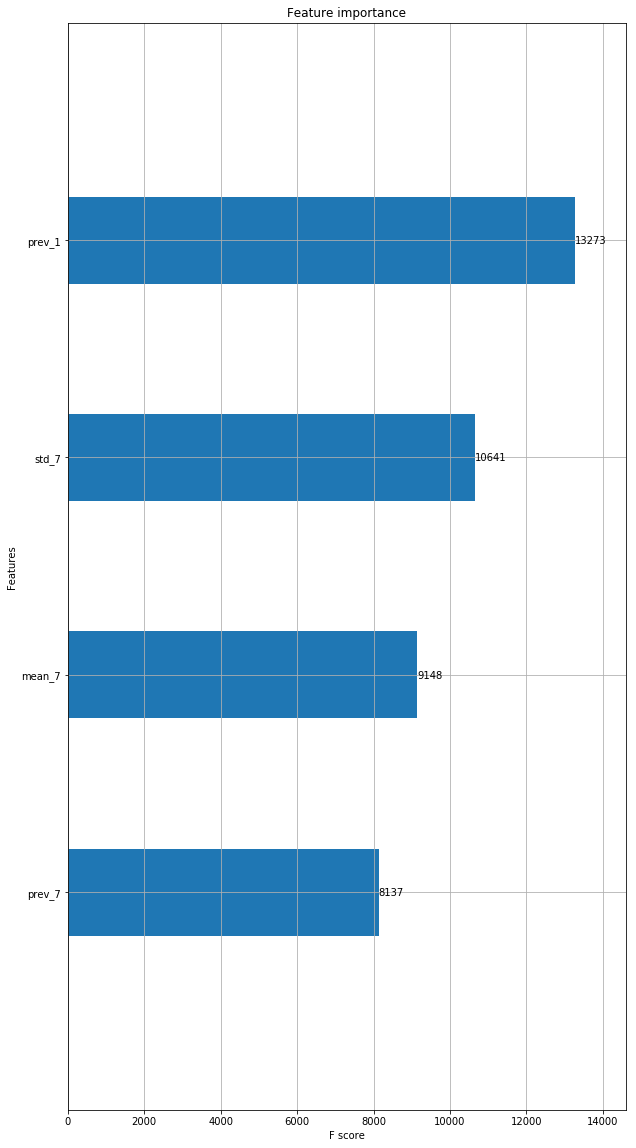

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 20))

xgb.plot_importance(bst, ax=ax, height=0.4)

In [35]:
from dsx_ml.ml import save

model_meta = save(name='XGBoost on timeseries',
     model=bst,
     x_test=pd.DataFrame(x_test),
     y_test=pd.DataFrame(y_test),
     algorithm_type='Regression',
     source='XGBoost on TimeSeries.jupyter-py35.ipynb',
     description='XGBoost model - for timeseries')

Using TensorFlow backend.


In [36]:
model_meta

{'path': '/user-home/1002/DSX_Projects/XGBoost/models/XGBoost on timeseries/1',
 'scoring_endpoint': 'https://dsxl-api/v3/project/score/Python35/xgboost-0.72/XGBoost/XGBoost%20on%20timeseries/1'}

In [47]:
bst.predict( xgb.DMatrix( water_level_2017[-1:][water_level_2017.columns[1:]] )).tolist()

[141.11558532714844]

In [59]:
water_level_2017[-1:][water_level_2017.columns[1:]].index[0].strftime(format="%d-%m-%Y")

'31-12-2017'

In [58]:
ts.strftime(format="%d-%m-%Y")

'31-12-2017'